# CIS 735 Machine Learning for Computer Security
## Assignment 1
### Submitted by: Hemaleka Mohanram
### SUID: 347121186

## About the Dataset

### * The zipped file “DataCIS735_Assignment1.zip” contains the data samples for this assignment.                 These are sourced from SU-AIS BB-MAS dataset1, the entire dataset can be accessed at http://dx.doi.org/10.21227/rpaz-0h66.                                                                                                                             There are five samples each, for “User A” and “User B” (total: ten files), in the “DataSamples” folder.               There are three test-samples that are labelled “Test1”, “Test2”, and “Test3”, in the “TestSamples” folder.            

### The “Demographics.csv” file contains demographic information about user A and B. 
### Each sample consists of about two seconds of walking data (this is known as windowing approach, data provided is already split into two second windows) collected by the phone in user’s pocket. 

### For this assignment we will only use the data from the accelerometer. The accelerometer files have five columns, "EID": event ID (Integer); "Xvalue", "Yvalue", "Zvalue": the acceleration force in m/s2 on x, y and z axes respectively, excluding the force of gravity (Float); and "time": the timestamp of the data point (String in date-time format with millisecond resolution).

## Import all necessary packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part A (10 Points): Basics and Visualization
###  *  a) Plot two data samples, one from each User. The plots must have accelerometer signals from X, Y, Z axes, a legend and title (the sample file name).
###  * b) In a separate graph, plot the density curves of the "Xvalue" columns from the two samples.
###  * c) Provide a summary of your observations from the plots. Summary need not be highly technical in nature; this is a practice to articulate insights from visualizing data. 

### Understanding the data

In [2]:
data_sample_path = "C:\\Users\\hemal\\Desktop\\Masters\\SEM3\\Machine Learning\\Assignment\\Assignment1\\DataCIS735_Assignment1\\DataSamples"
# data_sample_path = give_folder_path 


In [3]:
def read_df(data_sample_path):
    alldf={}
    # Reading the data
    for file_path in os.listdir(data_sample_path): 
        print ("Read the File for " + file_path)
        name = file_path[:-4] # just taking the file name ignoring the .csv part
        location =data_sample_path+"\\"+file_path
        alldf[name] = pd.read_csv(location,index_col="EID")
    return (alldf)

In [4]:
alldf = read_df(data_sample_path)

Read the File for UserA_1.csv
Read the File for UserA_2.csv
Read the File for UserA_3.csv
Read the File for UserA_4.csv
Read the File for UserA_5.csv
Read the File for UserB_1.csv
Read the File for UserB_2.csv
Read the File for UserB_3.csv
Read the File for UserB_4.csv
Read the File for UserB_5.csv


In [5]:
print(alldf)#['UserA_1']

{'UserA_1':          Xvalue    Yvalue    Zvalue                     time
EID                                                         
18275 -5.902905 -7.023391 -0.969652  2017-04-14 20:28:31.261
18276 -6.300342 -7.144298 -0.586579  2017-04-14 20:28:31.271
18277 -6.531382 -7.420828 -0.299275  2017-04-14 20:28:31.281
18278 -6.799533 -7.655460 -0.222661  2017-04-14 20:28:31.291
18279 -7.100005 -7.794323 -0.294487  2017-04-14 20:28:31.301
...         ...       ...       ...                      ...
18471  7.503428 -7.353790  6.247669  2017-04-14 20:28:33.221
18472  6.489484 -6.994660  5.467160  2017-04-14 20:28:33.231
18473  4.672285 -6.636727  4.432865  2017-04-14 20:28:33.241
18474  2.291251 -7.120356  2.278083  2017-04-14 20:28:33.251
18475  0.339977 -8.701726  0.628478  2017-04-14 20:28:33.261

[201 rows x 4 columns], 'UserA_2':          Xvalue     Yvalue    Zvalue                     time
EID                                                          
18476 -1.842338 -11.158177 -0.11133

In [6]:
def understanding_data(alldf):
    # im just looping over all files inside the data sample folder
    for i, user in enumerate(alldf.keys()):
        df = alldf[user]
        print("########################")
        print("Sample of Data for {}".format(user))
        print("########################")
        print(df.head())

        print("########################")
        print("ABOUT THE DATA")
        print("########################")
        print(df.info())

        print("########################")
        print("UNDERSTANDING THE NUMERICAL VARIABLE")
        print("########################")

        print(df.describe())
        print("########################")

        ## PLOTING
        print("PLOTING THE DATAFRAME")
        df=df.reset_index(drop=True)

        #plot
        # if possible do it in subplot
        lines=df.plot.hist()
        lines=df.plot.box()
        lines=df.plot.line()
        save_fig = user + ".png"
        plt.savefig(save_fig)

        plt.xlabel('Index')
        plt.ylabel('Accelerometer signals')

        plt.title(user)
        plt.legend()
        plt.show()
        plt.clf()

### Understanding the dataset of 2 users "UserA_1","UserB_1"

########################
Sample of Data for UserA_1
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
18275 -5.902905 -7.023391 -0.969652  2017-04-14 20:28:31.261
18276 -6.300342 -7.144298 -0.586579  2017-04-14 20:28:31.271
18277 -6.531382 -7.420828 -0.299275  2017-04-14 20:28:31.281
18278 -6.799533 -7.655460 -0.222661  2017-04-14 20:28:31.291
18279 -7.100005 -7.794323 -0.294487  2017-04-14 20:28:31.301
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 18275 to 18475
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  201.0

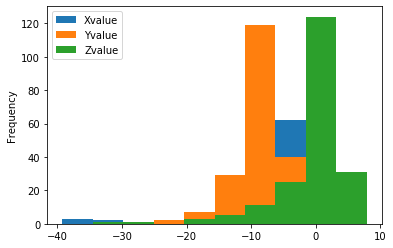

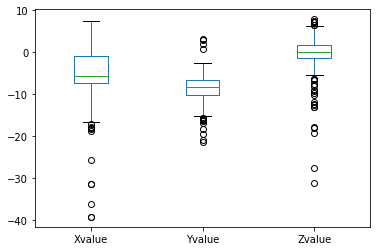

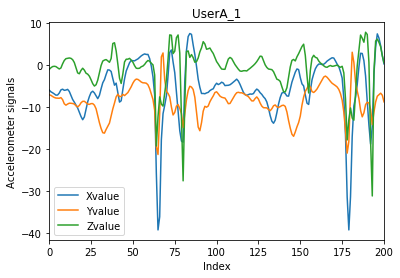

########################
Sample of Data for UserB_1
########################
         Xvalue     Yvalue    Zvalue                     time
EID                                                          
16800  0.509965 -11.725603 -1.954866  2017-04-17 15:15:09.095
16801  0.542287 -10.589554 -2.802413  2017-04-17 15:15:09.105
16802  0.683545  -9.170990 -1.051055  2017-04-17 15:15:09.114
16803  0.690727  -7.830236 -0.087388  2017-04-17 15:15:09.125
16804  0.760159  -6.851008  0.495600  2017-04-17 15:15:09.135
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 16800 to 17001
Data columns (total 4 columns):
Xvalue    202 non-null float64
Yvalue    202 non-null float64
Zvalue    202 non-null float64
time      202 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count

<Figure size 432x288 with 0 Axes>

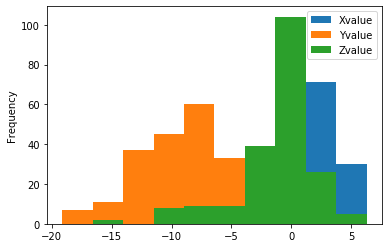

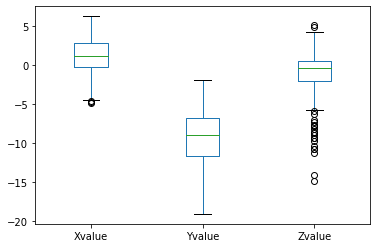

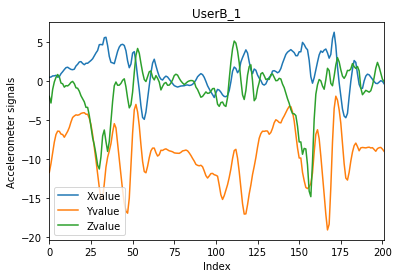

<Figure size 432x288 with 0 Axes>

In [7]:
only2UserValues = dict([(key, alldf[key]) for key in ["UserA_1","UserB_1"]])
understanding_data(only2UserValues)

########################
Sample of Data for UserA_1
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
18275 -5.902905 -7.023391 -0.969652  2017-04-14 20:28:31.261
18276 -6.300342 -7.144298 -0.586579  2017-04-14 20:28:31.271
18277 -6.531382 -7.420828 -0.299275  2017-04-14 20:28:31.281
18278 -6.799533 -7.655460 -0.222661  2017-04-14 20:28:31.291
18279 -7.100005 -7.794323 -0.294487  2017-04-14 20:28:31.301
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 18275 to 18475
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  201.0

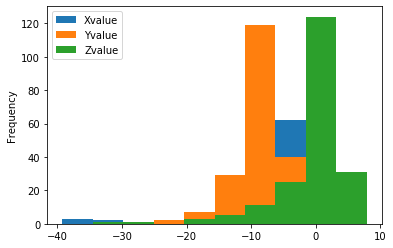

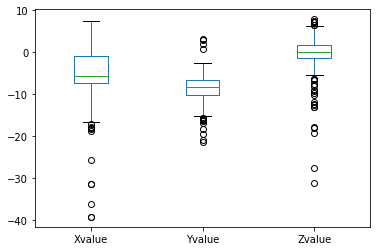

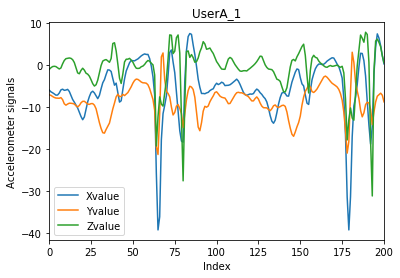

########################
Sample of Data for UserA_2
########################
         Xvalue     Yvalue    Zvalue                     time
EID                                                          
18476 -1.842338 -11.158177 -0.111330  2017-04-14 20:28:33.271
18477 -4.522647 -13.585897  0.128090  2017-04-14 20:28:33.281
18478 -6.068104 -13.864822  0.594959  2017-04-14 20:28:33.291
18479 -6.448782 -12.271481  1.656788  2017-04-14 20:28:33.301
18480 -6.837840 -10.565612  3.168726  2017-04-14 20:28:33.312
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 18476 to 18676
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count

<Figure size 432x288 with 0 Axes>

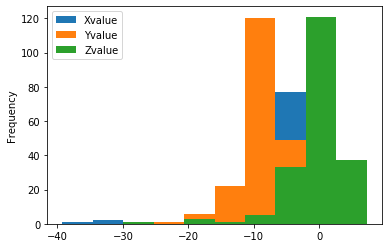

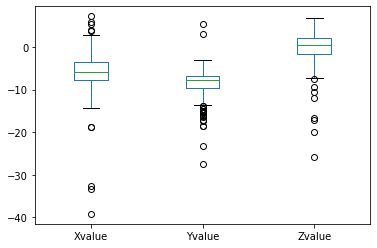

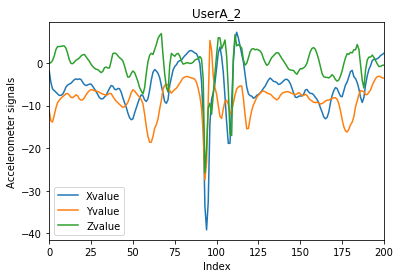

########################
Sample of Data for UserA_3
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
18677  2.562993 -3.588908 -0.312443  2017-04-14 20:28:35.281
18678  2.239776 -3.664326  0.160412  2017-04-14 20:28:35.293
18679  1.742979 -4.086902  0.673968  2017-04-14 20:28:35.303
18680  1.200692 -4.863821  0.714669  2017-04-14 20:28:35.311
18681  0.117316 -6.204574  0.742203  2017-04-14 20:28:35.322
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 18677 to 18882
Data columns (total 4 columns):
Xvalue    206 non-null float64
Yvalue    206 non-null float64
Zvalue    206 non-null float64
time      206 non-null object
dtypes: float64(3), object(1)
memory usage: 8.0+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  206.0

<Figure size 432x288 with 0 Axes>

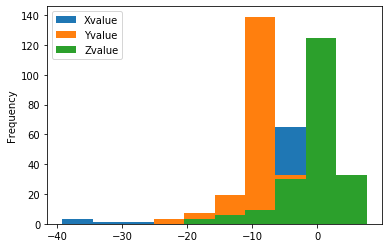

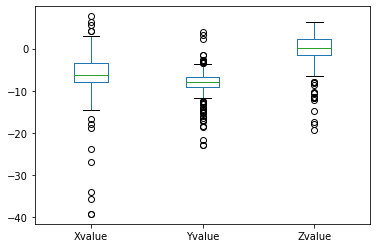

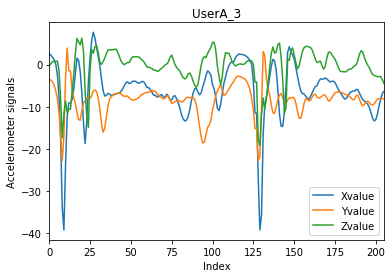

########################
Sample of Data for UserA_4
########################
         Xvalue     Yvalue    Zvalue                     time
EID                                                          
18883 -6.459556  -8.589199 -5.189432  2017-04-14 20:28:37.291
18884 -7.240066  -9.592369 -5.019444  2017-04-14 20:28:37.301
18885 -8.136695 -11.355699 -3.925294  2017-04-14 20:28:37.311
18886 -7.931990 -13.684060 -1.932121  2017-04-14 20:28:37.321
18887 -6.300342 -15.746665  0.187945  2017-04-14 20:28:37.331
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 18883 to 19087
Data columns (total 4 columns):
Xvalue    205 non-null float64
Yvalue    205 non-null float64
Zvalue    205 non-null float64
time      205 non-null object
dtypes: float64(3), object(1)
memory usage: 8.0+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count

<Figure size 432x288 with 0 Axes>

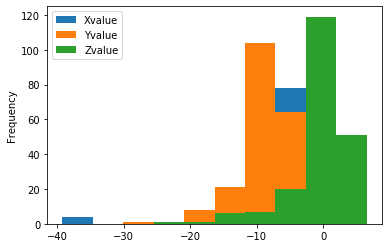

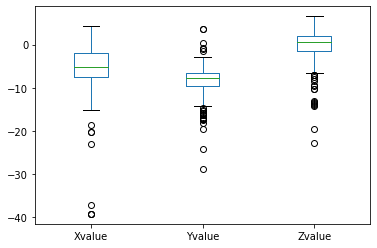

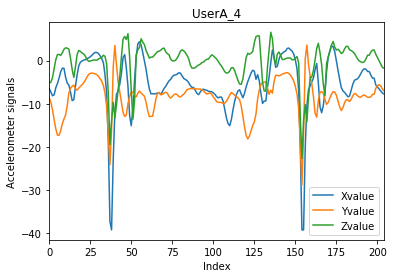

########################
Sample of Data for UserA_5
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
19088 -7.447165 -7.056910 -1.058237  2017-04-14 20:28:39.301
19089 -7.054515 -7.092823 -0.106542  2017-04-14 20:28:39.311
19090 -6.525397 -7.271191  0.410606  2017-04-14 20:28:39.321
19091 -5.977125 -7.546524  0.487220  2017-04-14 20:28:39.331
19092 -5.272032 -7.952341  0.829591  2017-04-14 20:28:39.342
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 19088 to 19289
Data columns (total 4 columns):
Xvalue    202 non-null float64
Yvalue    202 non-null float64
Zvalue    202 non-null float64
time      202 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  202.0

<Figure size 432x288 with 0 Axes>

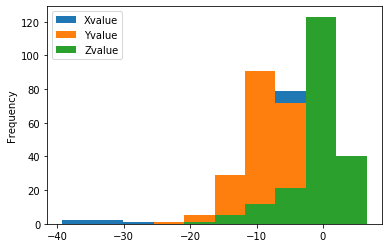

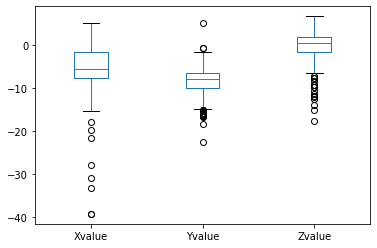

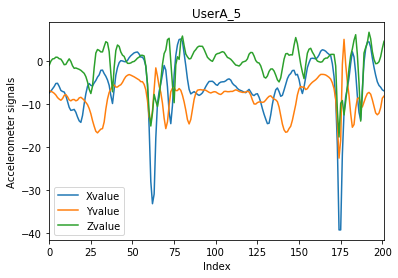

########################
Sample of Data for UserB_1
########################
         Xvalue     Yvalue    Zvalue                     time
EID                                                          
16800  0.509965 -11.725603 -1.954866  2017-04-17 15:15:09.095
16801  0.542287 -10.589554 -2.802413  2017-04-17 15:15:09.105
16802  0.683545  -9.170990 -1.051055  2017-04-17 15:15:09.114
16803  0.690727  -7.830236 -0.087388  2017-04-17 15:15:09.125
16804  0.760159  -6.851008  0.495600  2017-04-17 15:15:09.135
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 16800 to 17001
Data columns (total 4 columns):
Xvalue    202 non-null float64
Yvalue    202 non-null float64
Zvalue    202 non-null float64
time      202 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count

<Figure size 432x288 with 0 Axes>

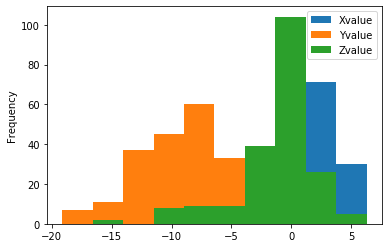

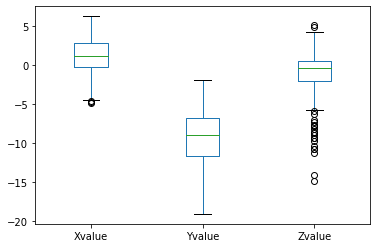

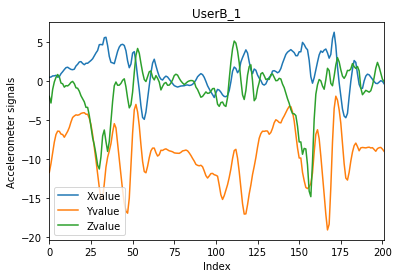

########################
Sample of Data for UserB_2
########################
         Xvalue     Yvalue    Zvalue                     time
EID                                                          
17002 -0.809240  -9.467871 -0.386664  2017-04-17 15:15:11.106
17003 -1.109712 -10.115502 -0.760159  2017-04-17 15:15:11.115
17004 -1.151611 -10.686520 -1.004368  2017-04-17 15:15:11.126
17005 -0.810437 -11.095928 -1.114501  2017-04-17 15:15:11.135
17006 -0.289698 -11.099519 -1.401805  2017-04-17 15:15:11.145
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17002 to 17202
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count

<Figure size 432x288 with 0 Axes>

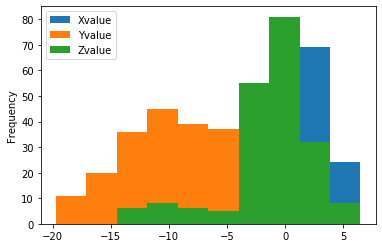

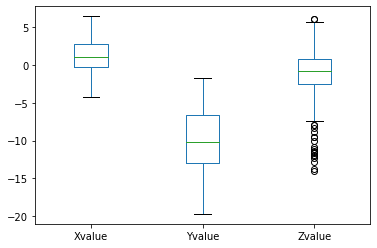

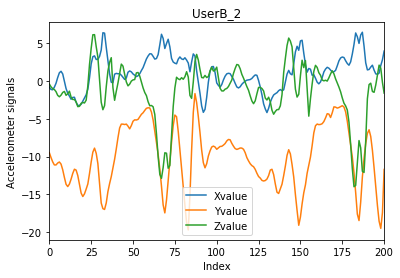

########################
Sample of Data for UserB_3
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
17203  6.048951 -5.998672 -1.679533  2017-04-17 15:15:13.116
17204  5.556942 -2.535460  1.177947  2017-04-17 15:15:13.128
17205  3.615245 -1.586159  3.105280  2017-04-17 15:15:13.136
17206  2.340332 -1.827973  2.500744  2017-04-17 15:15:13.145
17207  1.557428 -2.628834  1.298854  2017-04-17 15:15:13.156
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17203 to 17403
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  201.0

<Figure size 432x288 with 0 Axes>

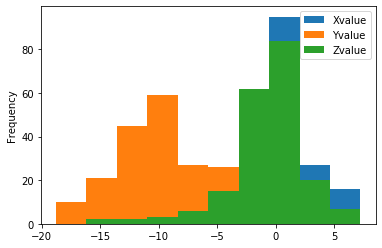

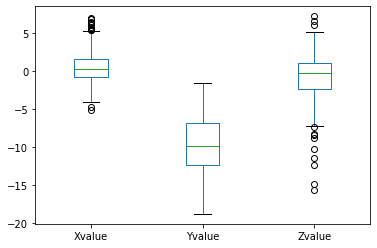

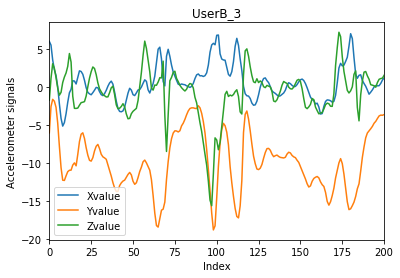

########################
Sample of Data for UserB_4
########################
         Xvalue    Yvalue    Zvalue                     time
EID                                                         
17404  1.525106 -3.274071  1.677138  2017-04-17 15:15:15.125
17405  1.927332 -2.887407  1.233014  2017-04-17 15:15:15.135
17406  2.513912 -2.480393  0.347159  2017-04-17 15:15:15.145
17407  3.147178 -2.261323 -0.772130  2017-04-17 15:15:15.155
17408  3.235764 -2.448071 -1.884237  2017-04-17 15:15:15.165
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17404 to 17604
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalue
count  201.0

<Figure size 432x288 with 0 Axes>

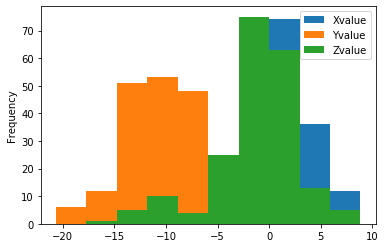

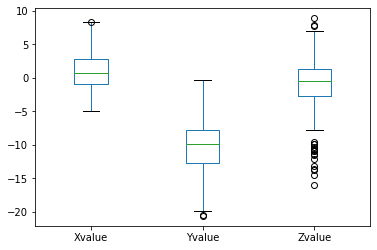

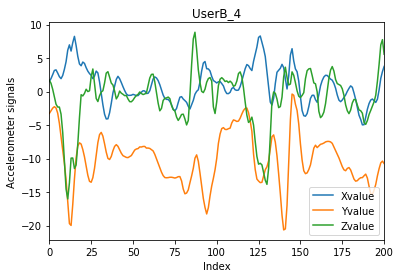

########################
Sample of Data for UserB_5
########################
          Xvalue     Yvalue    Zvalue                     time
EID                                                           
17605   4.514267 -12.210428  2.713828  2017-04-17 15:15:17.135
17606   5.501875 -14.516045 -0.166397  2017-04-17 15:15:17.145
17607   5.925649 -17.270575 -2.057816  2017-04-17 15:15:17.156
17608   9.455899 -17.211916 -2.410961  2017-04-17 15:15:17.165
17609  10.259154 -16.490065 -1.817199  2017-04-17 15:15:17.175
########################
ABOUT THE DATA
########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17605 to 17805
Data columns (total 4 columns):
Xvalue    201 non-null float64
Yvalue    201 non-null float64
Zvalue    201 non-null float64
time      201 non-null object
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
########################
UNDERSTANDING THE NUMERICAL VARIABLE
########################
           Xvalue      Yvalue      Zvalu

<Figure size 432x288 with 0 Axes>

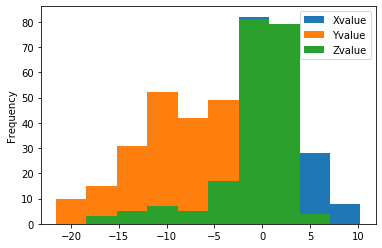

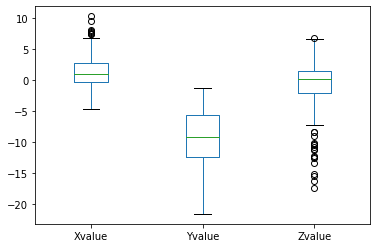

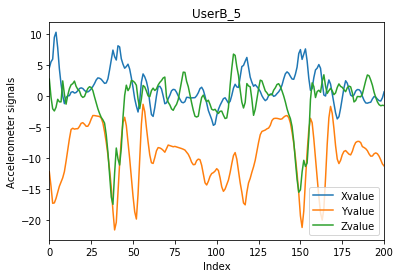

<Figure size 432x288 with 0 Axes>

In [8]:
## To Understand the data of all csvs use the below code
understanding_data(alldf)

## Density curve of samples

### Density curve is the distribution of the values - here "Xvalues

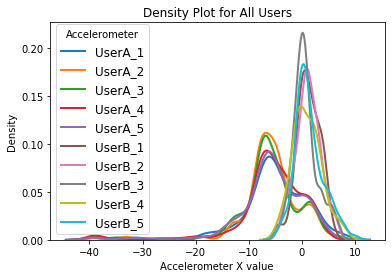

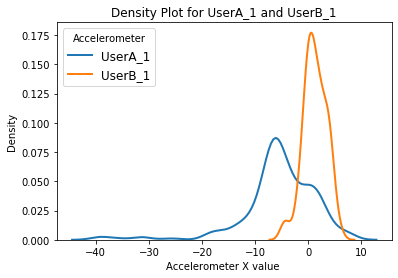

In [9]:
# Plotting the density curve of users
# For all Users use the below for loop

for i, user in enumerate(alldf.keys()):
    sns.distplot(alldf[user]['Xvalue'], hist = False, kde = True, kde_kws = {'linewidth': 2},label = str(user))

plt.legend(prop={'size': 12}, title = 'Accelerometer')
plt.title('Density Plot for All Users')
plt.xlabel('Accelerometer X value ')
plt.ylabel('Density')
plt.savefig("DensityCurvesAllUsers.png")
plt.show()
    
# For UserA_1 and UserB_1 only use below
for i, user in enumerate(["UserA_1","UserB_1"]):

    sns.distplot(alldf[user]['Xvalue'], hist = False, kde = True, kde_kws = {'linewidth': 2},label = str(user))

plt.legend(prop={'size': 12}, title = 'Accelerometer')
plt.title('Density Plot for UserA_1 and UserB_1')
plt.xlabel('Accelerometer X value ')
plt.ylabel('Density')
plt.savefig("DensityCurvesUA1_UB1.png")
plt.show()

## SUMMARY OF OBSERVATION

### From the line graph of Xvalue, Yvalue, Zvalue of USERA_1, I find that at the index value between 63 - 68 and 179 - 182 the X value suddenly varies a lot. Z value between index 80 - 82 and 193 - 195 also suddenly drops at 175 index all three values superimpose

#### The sudden drop can be a outlier point but it can only be decided based on the context 

### If we see the box plot graphs, we can find that for X, Y, Z  values there are many values below lower extreme and upper extreme  
#### Those points can be potential outliers 

### From the graph of Xvalue, Yvalue, Zvalue of USERB_1, I find that at the index value at 27 Y and Zvalues drop suddenly at 47 Y value suddenly increases at 162 Y and Z value superimpose and decrease where as X value increases. Between 25 - 75 100-125, 160-175 Y value fluctuates heavyly  

#### The fluctuations can be noise in the dataset



### From the density curve, I find that:
* For USER A the distribution of X value is between -20 to 10 with more values at around -6  
* For USERB, the X values varies between -10 and 10 with peak value at around 0

## Part B (30 Points): Feature Design, Description and Extraction (to be performed on all data samples)
### a) Design and describe at least 5 features (or more) to be extracted from each (X,Y, Z) columns of the data-samples.
### b) Write a program to extract the 5 features (or more) from each data-sample and store them in a single file named “Features.csv” with the following format: 
####   User Sample no. <Feature_1> <Feature_2> .. .. <Feature_n> Where, “User” is A or B, “Sample no.” is the data-sample file number, and <Feature_1> to <Feature_n> are feature values extracted from the sample (label the feature columns accordingly, for example if feature is “mean” of Xvalue , then label the feature “mean_X”)
### c) Provide a summary of your observations from tasks in part B:
####  a. Why did you choose the features that you did?
####  b. What are other features that can be explored for this data?
####  c. Do you think the selected features would work for all forms of data, why or why not?

### PART a, b Feature Extraction:
#### I'm planning to extract, Mean, std, var, max, SUm for each column

In [10]:

def feature_extraction(alldf,name):
    features=["Mean_X","std_X","Var_X","max_X","sum_X","Mean_X","std_Y","Var_Y","max_Y","sum_Y","Mean_Z","std_Z","Var_Z","max_Z","sum_Z"]

    feature_df = []

    #looping over each file
    for i, user in enumerate(alldf.keys()):
        feature_vector=[]
        # looping over each column 
        for column in alldf[user].columns[:-1]:
            feature_vector.extend([alldf[user][column].mean(),alldf[user][column].std(),alldf[user][column].var(),alldf[user][column].max(),alldf[user][column].sum() ])

        #print(feature_vector)

        feature_vector=[user] + feature_vector
        feature_df.append(feature_vector)

    Final_feature_df=pd.DataFrame(data=feature_df,columns=["User"]+features)

    print(Final_feature_df)

    # Wrting the feature to csv file
    feature_name = name + ".csv"
    Final_feature_df.to_csv(feature_name,index=False)
    print("###########################")
    print("Saving the {}".format(feature_name))
    print("###########################")
    return Final_feature_df

In [11]:
Final_feature_alldf =feature_extraction(alldf,name = "FeaturesDF")

      User    Mean_X     std_X      Var_X      max_X        sum_X     Mean_X  \
0  UserA_1 -5.448220  7.194467  51.760362   7.583634 -1095.092292  -8.544412   
1  UserA_2 -5.647892  5.667407  32.119500   7.249643 -1135.226298  -8.460049   
2  UserA_3 -6.203121  6.640865  44.101088   7.653066 -1277.842912  -8.306009   
3  UserA_4 -5.498962  6.599807  43.557453   4.399345 -1127.287131  -8.292113   
4  UserA_5 -5.781879  6.639207  44.079069   5.030218 -1167.939476  -8.483160   
5  UserB_1  1.244126  2.172403   4.719334   6.301539   251.313367  -9.255119   
6  UserB_2  1.185463  2.308806   5.330586   6.460753   238.278137 -10.114543   
7  UserB_3  0.649192  2.346013   5.503778   7.064092   130.487584  -9.726754   
8  UserB_4  1.000216  2.704621   7.314973   8.293514   201.043510 -10.011831   
9  UserB_5  1.389804  2.685131   7.209928  10.259154   279.350666  -9.535522   

      std_Y      Var_Y     max_Y        sum_Y    Mean_Z     std_Z      Var_Z  \
0  3.756054  14.107939  3.123236 -1717.

## Part c
### a. Why did you choose the features that you did?
* Since it is a numerical column, I took these features like mean, standard deviation, variance, maximum, sum these features  will help us understand our numeric column and distribution
###  b. What are other features that can be explored for this data?
* We can try other features like IQR inter Quantile range, distance between X,Y,Z value points etc , Squareroot, Log value etc
###  c. Do you think the selected features would work for all forms of data, why or why not?
* All these selected features will work only for numeric data and Non Null values 

## Part C (30 Points): Distance Measures, Measuring Similarities or Dissimilarities
### a) List and describe at least 2 distance measures that can be used to measure similarities or dissimilarities between the feature vectors (rows) in “Features.csv”.

### b) Write a program to implement the two distance measures to measure distances between each feature vector pairs. Store the results in a single file named “Distance.csv” with the following format:
## FV1_User FV2_User <DistanceMeasure_1> <DistanceMeasure_2>

### Where, “FV1_User” and “FV2_User” columns are the User to whom the Feature Vectors (that are being compared) belong to and “<DistanceMeasure_1>” and “<DistanceMeasure_2>” are the results of applying the distance measure on the two vectors. (label the distance columns accordingly, for example if distance function is “Euclidean”, name the column “Euclidean_Distance”)

### c) Briefly explain how the distance measures performed with the help of density curves for intra-user and inter-user distances.
### d) If you were to use the demographic information as features. How would you transform them to work with the distance measures? Briefly explain for each column (except “User”) in the “Demographics.csv” fil

In [12]:
# read the feature vector
features_dist = pd.read_csv("FeaturesDF.csv")

features_dist=features_dist.drop(["User"],axis=1)


In [13]:
features_dist.head()

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-5.448220,7.194467,51.760362,7.583634,-1095.092292,-8.544412,3.756054,14.107939,3.123236,-1717.426724,-0.630163,5.239414,27.451458,7.887698,-126.662844
1,-5.647892,5.667407,32.119500,7.249643,-1135.226298,-8.460049,3.775712,14.256000,5.335478,-1700.469786,-0.209558,4.175743,17.436827,6.922834,-42.121189
2,-6.203121,6.640865,44.101088,7.653066,-1277.842912,-8.306009,3.658560,13.385059,3.896563,-1711.037787,-0.524609,4.310789,18.582906,6.268020,-108.069477
3,-5.498962,6.599807,43.557453,4.399345,-1127.287131,-8.292113,4.120428,16.977929,3.606865,-1699.883211,-0.438016,4.347388,18.899783,6.582858,-89.793337
4,-5.781879,6.639207,44.079069,5.030218,-1167.939476,-8.483160,3.708039,13.749555,4.954801,-1713.598390,-0.588725,4.032829,16.263713,6.605602,-118.922394


## Correlation Heat map

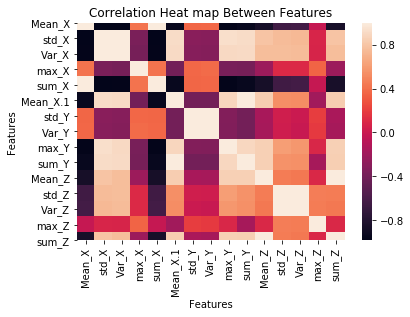

In [14]:
# Correlation heat map
# By default .corr uses Pearson correlation
sns.heatmap(features_dist.corr())

plt.title('Correlation Heat map Between Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.savefig("CorrelationHeatMap.png")
plt.show()


## I'm Taking Eucldian Distance and CityBlock distance
### Euclidean Distance
#### * Euclidean Distance represents the shortest distance between two points.

### CIty Block Distance or Manhattan distance
#### * Manhattan distance is the absolute distance between two points
#### Both Eclidian and Manhattan distance are derived from MINKOWSKI FOR DIFFERENT VALUES OF P:
#### For, p=1, the distance measure is the Manhattan measure.
#### p=2, the distance measure is the Euclidean measure.


### Calculating distance using packages


In [15]:
from scipy.spatial.distance import pdist
ED=[]
MH=[]
ED=pdist(features_dist, 'euclidean')
MH=pdist(features_dist, 'cityblock')
print("Euclidian")
print(ED)
print("Manhattan")
print(MH)

Euclidian
[  97.67942402  184.19338088   53.53279557   74.6925754  1361.51645521
 1379.2212952  1249.64352841 1334.61130119 1390.83747203  157.95588413
   49.88719413   85.39264798 1412.50087984 1432.72395106 1295.9518192
 1386.14167024 1438.38870134  152.15215842  110.53065454 1544.43456939
 1559.54364777 1430.53084774 1515.20806613 1573.07738633   52.05275999
 1398.80327139 1418.46491659 1285.47114317 1372.97046417 1426.93796197
 1434.38094902 1451.14312998 1321.68913717 1406.65076203 1463.48361886
  166.19623496  178.27628396  152.27632535   85.57117267  182.88448504
   58.39845316  153.45613515  125.21366844  157.77164169  134.05071502]
Manhattan
[ 178.26227837  230.12464363  113.55143733  111.55667312 1711.50799452
 1884.4856793  1571.67224107 1776.45186904 1716.16775356  237.87864144
   78.73370069  140.91810051 1822.68011431 1995.32236127 1683.17451047
 1889.88625971 1827.67241763  189.64230811  131.03293777 1900.73242964
 2075.35086316 1764.51264084 1970.41754442 1907.84935989 

### Calculate distance by direct formula


In [16]:
#features_dist
def Calculate_distance(features_dist):
    Euclidian = []
    manhattan = []
    usercol = ["A"]*5 +["B"]*5
    FV1user = []
    FV2user = []
    for i in range(0,10):
        for j in range (i+1,10):
            a = features_dist.iloc[i].tolist()
            b = features_dist.iloc[j].tolist()
            FV1user.append(usercol[i])
            FV2user.append(usercol[j])

            # Euclidian distance
            Euclidian.append(sum((colA-colB)**2 for colA, colB in zip(a, b)) ** .5)

            # Manhanttan distance

            manhattan.append(sum(abs((colA-ColB)) for colA, ColB in zip(a, b)))

    print("###################")
    print("Euclidian distance")
    print("###################")
    print(Euclidian)

    print("###################")
    print("Manhattan distance")
    print("###################")
    print(manhattan)
    print(FV1user)
    print(FV2user)
    distance_df = pd.DataFrame()

    distance_df["FV1_User"] = FV1user
    distance_df["FV2_User"] = FV2user

    distance_df["Euclidian_Distance"] = Euclidian
    distance_df["Manhattan_Distance"] = manhattan
    
    print("\n###########################")
    print("DISTANCE MEASURES")
    print("########################### \n")
    
    print(distance_df)
    print("###########################")
    
    return distance_df



#### Creating distance dataframe

In [17]:
distance_df = Calculate_distance(features_dist)

###################
Euclidian distance
###################
[97.67942402358298, 184.1933808846047, 53.53279556858681, 74.69257540381102, 1361.516455208383, 1379.2212952046984, 1249.6435284103827, 1334.6113011934842, 1390.8374720324498, 157.95588413466666, 49.8871941262209, 85.39264798490575, 1412.500879835795, 1432.7239510640502, 1295.951819203984, 1386.141670243307, 1438.3887013377196, 152.15215842423046, 110.53065454149021, 1544.4345693900298, 1559.5436477722117, 1430.5308477422207, 1515.208066132484, 1573.077386325623, 52.05275999451813, 1398.803271392545, 1418.4649165926776, 1285.471143166159, 1372.9704641712947, 1426.9379619692115, 1434.3809490245253, 1451.1431299796536, 1321.6891371729357, 1406.6507620331015, 1463.4836188561605, 166.19623496018295, 178.276283959265, 152.2763253524168, 85.5711726713118, 182.8844850432231, 58.39845315736554, 153.4561351511797, 125.21366844017662, 157.77164169024377, 134.05071502435075]
###################
Manhattan distance
###################
[178.

In [18]:
distance_df.head()

,FV1_User,FV2_User,Euclidian_Distance,Manhattan_Distance
0,A,A,97.679424,178.262278
1,A,A,184.193381,230.124644
2,A,A,53.532796,113.551437
3,A,A,74.692575,111.556673
4,A,B,1361.516455,1711.507995


### C Finding the Intra User and inter user density


### Intra user density: between same user


In [19]:

# Intra User means FV1user = FV2user
# Filter data frame for intra user

Intrauser_distancedf = distance_df[distance_df["FV1_User"] == distance_df["FV2_User"]]
Intrauser_distancedf=Intrauser_distancedf.reset_index(drop = True)


print("###################")
print("Intra User distance")
print("###################")
print(Intrauser_distancedf)


###################
Intra User distance
###################
   FV1_User FV2_User  Euclidian_Distance  Manhattan_Distance
0         A        A           97.679424          178.262278
1         A        A          184.193381          230.124644
2         A        A           53.532796          113.551437
3         A        A           74.692575          111.556673
4         A        A          157.955884          237.878641
5         A        A           49.887194           78.733701
6         A        A           85.392648          140.918101
7         A        A          152.152158          189.642308
8         A        A          110.530655          131.032938
9         A        A           52.052760           93.275213
10        B        B          166.196235          214.947359
11        B        B          178.276284          315.247813
12        B        B          152.276325          228.624049
13        B        B           85.571173          164.801695
14        B        B     

### InterUser Distance between 2 different users

In [20]:
# Inter User means FV1user != FV2user
# Filter data frame for inter user


Interuser_distancedf = distance_df[distance_df["FV1_User"] != distance_df["FV2_User"]]
Interuser_distancedf = Interuser_distancedf.reset_index(drop = True)

print("###################")
print("Inter User distance")
print("###################")
print(Interuser_distancedf)

###################
Inter User distance
###################
   FV1_User FV2_User  Euclidian_Distance  Manhattan_Distance
0         A        B         1361.516455         1711.507995
1         A        B         1379.221295         1884.485679
2         A        B         1249.643528         1571.672241
3         A        B         1334.611301         1776.451869
4         A        B         1390.837472         1716.167754
5         A        B         1412.500880         1822.680114
6         A        B         1432.723951         1995.322361
7         A        B         1295.951819         1683.174510
8         A        B         1386.141670         1889.886260
9         A        B         1438.388701         1827.672418
10        A        B         1544.434569         1900.732430
11        A        B         1559.543648         2075.350863
12        A        B         1430.530848         1764.512641
13        A        B         1515.208066         1970.417544
14        A        B     

### Plotting the density curve of users


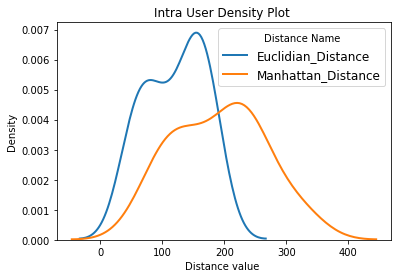

In [21]:
#for i, user in enumerate(alldf.keys()):
sns.distplot(Intrauser_distancedf["Euclidian_Distance"], hist = False, kde = True, kde_kws = {'linewidth': 2},label = "Euclidian_Distance")
sns.distplot(Intrauser_distancedf["Manhattan_Distance"], hist = False, kde = True, kde_kws = {'linewidth': 2},label = "Manhattan_Distance")

plt.legend(prop={'size': 12}, title = 'Distance Name')
plt.title('Intra User Density Plot ')
plt.xlabel('Distance value ')
plt.ylabel('Density')
plt.savefig("Intra_User_DensityCurves.png")


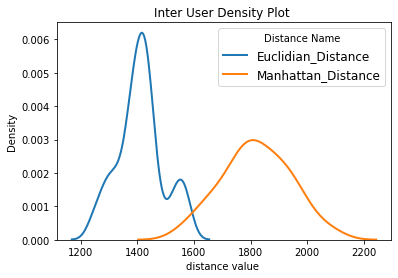

In [22]:
sns.distplot(Interuser_distancedf["Euclidian_Distance"], hist = False, kde = True, kde_kws = {'linewidth': 2},label = "Euclidian_Distance")
sns.distplot(Interuser_distancedf["Manhattan_Distance"], hist = False, kde = True, kde_kws = {'linewidth': 2},label = "Manhattan_Distance")

plt.legend(prop={'size': 12}, title = 'Distance Name')
plt.title('Inter User Density Plot ')
plt.xlabel('distance value ')
plt.ylabel('Density')
plt.savefig("Inter_User_DensityCurves.png")


## Part C explanation
### * From both distance measures i Find that 
### * Intra Distance measure values are small 
### * Inter Distance values are large
### * Both intra and inter distanc density curve look like gaussian distribution


## Part d
### * If there is a categorical column then we can either transform that column to numerical using different techniques like one hot encoding etc. and then find the distance as usual
### or if there are only categorical variables we can use overlap method to find the distance
### If we have both numerical and categorical variables , then we follow heterogenous distance measure
### i.e. finding distance for numerical columns seperately and adding that with the distance value between categorical variables


## Part D (30 Points): A simplistic matching attempt.
### a) Using the techniques from Part B, extract features from test-samples “Test1”, “Test2” and “Test3”.
### b) Using a distance measure from Part C, classify each test sample as either: “belongs to user A” or “belongs to user B”. Describe your method to arrive at a decision. 

In [23]:
data_test_path = "C:\\Users\\hemal\\Desktop\\Masters\\SEM3\\Machine Learning\\Assignment\\Assignment1\\DataCIS735_Assignment1\\TestSamples"
allTestDf = read_df(data_test_path)

Read the File for Test1.csv
Read the File for Test2.csv
Read the File for Test3.csv


In [24]:
allTestDf

{'Test1':         Xvalue     Yvalue     Zvalue  time
 EID                                       
 1    -4.122815  -7.331046   0.652420     1
 2    -4.367024  -7.760805   0.761356     2
 3    -4.523844  -8.234857   0.877475     3
 4    -4.695030  -8.321048   1.418565     4
 5    -5.000290  -8.395268   1.985990     5
 ..         ...        ...        ...   ...
 198   0.579397 -11.628637   5.984307   198
 199  -3.561375  -9.453506   3.864242   199
 200  -8.169016  -8.856153  -0.506374   200
 201 -14.077906  -9.783905  -7.935582   201
 202 -18.452112 -12.164939 -14.985309   202
 
 [202 rows x 4 columns], 'Test2':        Xvalue     Yvalue    Zvalue  time
 EID                                     
 1   -9.249998 -11.768699 -2.234987     1
 2   -2.110489 -10.127473  0.786495     2
 3    0.988805  -8.797494  3.154361     3
 4    2.628834  -7.854179  4.856638     4
 5    2.491167  -7.627927  5.820304     5
 ..        ...        ...       ...   ...
 198  0.174777  -5.469554  2.647987   198
 199  

In [25]:
Final_feature_allTestdf =feature_extraction(allTestDf,name = "FeaturesTestDF") 

    User    Mean_X     std_X      Var_X      max_X        sum_X    Mean_X  \
0  Test1 -6.067310  6.748801  45.546315   3.866636 -1225.596641 -8.346875   
1  Test2 -5.748140  5.271289  27.786492   2.628834 -1161.124375 -8.430198   
2  Test3  1.182211  2.757347   7.602963  10.314221   239.988792 -9.950420   

      std_Y      Var_Y     max_Y        sum_Y    Mean_Z     std_Z      Var_Z  \
0  4.039457  16.317210  7.129933 -1686.068665 -0.654103  4.388725  19.260907   
1  3.351803  11.234586  2.715025 -1702.899900  0.031006  3.363002  11.309783   
2  4.621259  21.356036 -0.885855 -2019.935299 -0.921001  4.171928  17.404984   

      max_Z       sum_Z  
0  7.169437 -132.128809  
1  5.820304    6.263228  
2  8.088810 -186.963209  
###########################
Saving the FeaturesTestDF.csv
###########################


### Finding the distance values for test data

In [26]:
# read the feature vector
features_dist_test = pd.read_csv("FeaturesTestDF.csv")

features_dist_test =features_dist_test.drop(["User"],axis=1)


## Now to find where each file of test data belong to, we find the distance between the test data and A, and test data and B which ever distance is small, the test file belong to that category

In [27]:

traindf=pd.read_csv('Featuresdf.csv')
#divide the training features into A and B users

traindfA=traindf[:5]
traindfB=traindf[5:]



In [28]:
features_dist

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-5.448220,7.194467,51.760362,7.583634,-1095.092292,-8.544412,3.756054,14.107939,3.123236,-1717.426724,-0.630163,5.239414,27.451458,7.887698,-126.662844
1,-5.647892,5.667407,32.119500,7.249643,-1135.226298,-8.460049,3.775712,14.256000,5.335478,-1700.469786,-0.209558,4.175743,17.436827,6.922834,-42.121189
2,-6.203121,6.640865,44.101088,7.653066,-1277.842912,-8.306009,3.658560,13.385059,3.896563,-1711.037787,-0.524609,4.310789,18.582906,6.268020,-108.069477
3,-5.498962,6.599807,43.557453,4.399345,-1127.287131,-8.292113,4.120428,16.977929,3.606865,-1699.883211,-0.438016,4.347388,18.899783,6.582858,-89.793337
4,-5.781879,6.639207,44.079069,5.030218,-1167.939476,-8.483160,3.708039,13.749555,4.954801,-1713.598390,-0.588725,4.032829,16.263713,6.605602,-118.922394
5,1.244126,2.172403,4.719334,6.301539,251.313367,-9.255119,3.483678,12.136013,-1.926135,-1869.533946,-1.237079,3.313341,10.978230,5.167884,-249.890014
6,1.185463,2.308806,5.330586,6.460753,238.278137,-10.114543,4.124843,17.014330,-1.657985,-2033.023206,-1.373593,3.747206,14.041549,6.142324,-276.092157
7,0.649192,2.346013,5.503778,7.064092,130.487584,-9.726754,3.918045,15.351075,-1.586159,-1955.077575,-0.749498,3.275703,10.730230,7.255628,-150.649157
8,1.000216,2.704621,7.314973,8.293514,201.043510,-10.011831,3.929993,15.444843,-0.373495,-2012.378004,-1.176506,4.133389,17.084906,8.850166,-236.477696
9,1.389804,2.685131,7.209928,10.259154,279.350666,-9.535522,4.459829,19.890072,-1.334767,-1916.639864,-0.920797,4.059337,16.478213,6.745663,-185.080171


In [29]:
features_dist_test

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-6.067310,6.748801,45.546315,3.866636,-1225.596641,-8.346875,4.039457,16.317210,7.129933,-1686.068665,-0.654103,4.388725,19.260907,7.169437,-132.128809
1,-5.748140,5.271289,27.786492,2.628834,-1161.124375,-8.430198,3.351803,11.234586,2.715025,-1702.899900,0.031006,3.363002,11.309783,5.820304,6.263228
2,1.182211,2.757347,7.602963,10.314221,239.988792,-9.950420,4.621259,21.356036,-0.885855,-2019.935299,-0.921001,4.171928,17.404984,8.088810,-186.963209


In [30]:
merged = pd.concat([features_dist_test,features_dist]) # seperate User A alone
merged = merged.reset_index(drop = True)
merged

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-6.067310,6.748801,45.546315,3.866636,-1225.596641,-8.346875,4.039457,16.317210,7.129933,-1686.068665,-0.654103,4.388725,19.260907,7.169437,-132.128809
1,-5.748140,5.271289,27.786492,2.628834,-1161.124375,-8.430198,3.351803,11.234586,2.715025,-1702.899900,0.031006,3.363002,11.309783,5.820304,6.263228
2,1.182211,2.757347,7.602963,10.314221,239.988792,-9.950420,4.621259,21.356036,-0.885855,-2019.935299,-0.921001,4.171928,17.404984,8.088810,-186.963209
3,-5.448220,7.194467,51.760362,7.583634,-1095.092292,-8.544412,3.756054,14.107939,3.123236,-1717.426724,-0.630163,5.239414,27.451458,7.887698,-126.662844
4,-5.647892,5.667407,32.119500,7.249643,-1135.226298,-8.460049,3.775712,14.256000,5.335478,-1700.469786,-0.209558,4.175743,17.436827,6.922834,-42.121189
5,-6.203121,6.640865,44.101088,7.653066,-1277.842912,-8.306009,3.658560,13.385059,3.896563,-1711.037787,-0.524609,4.310789,18.582906,6.268020,-108.069477
6,-5.498962,6.599807,43.557453,4.399345,-1127.287131,-8.292113,4.120428,16.977929,3.606865,-1699.883211,-0.438016,4.347388,18.899783,6.582858,-89.793337
7,-5.781879,6.639207,44.079069,5.030218,-1167.939476,-8.483160,3.708039,13.749555,4.954801,-1713.598390,-0.588725,4.032829,16.263713,6.605602,-118.922394
8,1.244126,2.172403,4.719334,6.301539,251.313367,-9.255119,3.483678,12.136013,-1.926135,-1869.533946,-1.237079,3.313341,10.978230,5.167884,-249.890014
9,1.185463,2.308806,5.330586,6.460753,238.278137,-10.114543,4.124843,17.014330,-1.657985,-2033.023206,-1.373593,3.747206,14.041549,6.142324,-276.092157


In [31]:
mergedTestAndUserA = pd.concat([features_dist_test,features_dist[:5]]) # seperate User A alone
mergedTestAndUserA = mergedTestAndUserA.reset_index(drop = True)
mergedTestAndUserA

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-6.067310,6.748801,45.546315,3.866636,-1225.596641,-8.346875,4.039457,16.317210,7.129933,-1686.068665,-0.654103,4.388725,19.260907,7.169437,-132.128809
1,-5.748140,5.271289,27.786492,2.628834,-1161.124375,-8.430198,3.351803,11.234586,2.715025,-1702.899900,0.031006,3.363002,11.309783,5.820304,6.263228
2,1.182211,2.757347,7.602963,10.314221,239.988792,-9.950420,4.621259,21.356036,-0.885855,-2019.935299,-0.921001,4.171928,17.404984,8.088810,-186.963209
3,-5.448220,7.194467,51.760362,7.583634,-1095.092292,-8.544412,3.756054,14.107939,3.123236,-1717.426724,-0.630163,5.239414,27.451458,7.887698,-126.662844
4,-5.647892,5.667407,32.119500,7.249643,-1135.226298,-8.460049,3.775712,14.256000,5.335478,-1700.469786,-0.209558,4.175743,17.436827,6.922834,-42.121189
5,-6.203121,6.640865,44.101088,7.653066,-1277.842912,-8.306009,3.658560,13.385059,3.896563,-1711.037787,-0.524609,4.310789,18.582906,6.268020,-108.069477
6,-5.498962,6.599807,43.557453,4.399345,-1127.287131,-8.292113,4.120428,16.977929,3.606865,-1699.883211,-0.438016,4.347388,18.899783,6.582858,-89.793337
7,-5.781879,6.639207,44.079069,5.030218,-1167.939476,-8.483160,3.708039,13.749555,4.954801,-1713.598390,-0.588725,4.032829,16.263713,6.605602,-118.922394


In [32]:
mergedTestAndUserB = pd.concat([features_dist_test,features_dist[5:]]) # seperate User A alone
mergedTestAndUserB = mergedTestAndUserB.reset_index(drop = True)
mergedTestAndUserB

,Mean_X,std_X,Var_X,max_X,sum_X,Mean_X.1,std_Y,Var_Y,max_Y,sum_Y,Mean_Z,std_Z,Var_Z,max_Z,sum_Z
0,-6.067310,6.748801,45.546315,3.866636,-1225.596641,-8.346875,4.039457,16.317210,7.129933,-1686.068665,-0.654103,4.388725,19.260907,7.169437,-132.128809
1,-5.748140,5.271289,27.786492,2.628834,-1161.124375,-8.430198,3.351803,11.234586,2.715025,-1702.899900,0.031006,3.363002,11.309783,5.820304,6.263228
2,1.182211,2.757347,7.602963,10.314221,239.988792,-9.950420,4.621259,21.356036,-0.885855,-2019.935299,-0.921001,4.171928,17.404984,8.088810,-186.963209
3,1.244126,2.172403,4.719334,6.301539,251.313367,-9.255119,3.483678,12.136013,-1.926135,-1869.533946,-1.237079,3.313341,10.978230,5.167884,-249.890014
4,1.185463,2.308806,5.330586,6.460753,238.278137,-10.114543,4.124843,17.014330,-1.657985,-2033.023206,-1.373593,3.747206,14.041549,6.142324,-276.092157
5,0.649192,2.346013,5.503778,7.064092,130.487584,-9.726754,3.918045,15.351075,-1.586159,-1955.077575,-0.749498,3.275703,10.730230,7.255628,-150.649157
6,1.000216,2.704621,7.314973,8.293514,201.043510,-10.011831,3.929993,15.444843,-0.373495,-2012.378004,-1.176506,4.133389,17.084906,8.850166,-236.477696
7,1.389804,2.685131,7.209928,10.259154,279.350666,-9.535522,4.459829,19.890072,-1.334767,-1916.639864,-0.920797,4.059337,16.478213,6.745663,-185.080171


In [33]:
ED=[]
MH=[]
ED=pdist(mergedTestAndUserA, 'euclidean')
MH=pdist(mergedTestAndUserA, 'cityblock')
print("Euclidian user A And test")
print(ED)
print("Manhattan User A and Test")
print(MH)

mergedTestAndUserA
ED=[]
MH=[]
ED=pdist(mergedTestAndUserB, 'euclidean')
MH=pdist(mergedTestAndUserB, 'cityblock')
print("Euclidian User B And test")
print(ED)
print("Manhattan User B and Test")
print(MH)


Euclidian user A And test
[ 154.99649747 1504.67974032  134.85911607  129.15035539   62.99945403
  108.00860681   65.43033348 1449.70686296  152.05615843   55.79975301
  164.66735357  103.57788339  127.05468335 1371.05199997 1419.51169763
 1551.43762852 1408.10262709 1443.00188799   97.67942402  184.19338088
   53.53279557   74.6925754   157.95588413   49.88719413   85.39264798
  152.15215842  110.53065454   52.05275999]
Manhattan User A and Test
[ 261.76944261 1928.41733306  194.80452249  220.05051163  115.12425921
  163.2230883   110.61195123 1975.32486169  269.18342537  100.5412976
  275.33971291  169.37752074  174.98755957 1780.97987522 1894.41426589
 1974.9455506  1851.58004368 1853.83552246  178.26227837  230.12464363
  113.55143733  111.55667312  237.87864144   78.73370069  140.91810051
  189.64230811  131.03293777   93.27521251]
Euclidian User B And test
[ 154.99649747 1504.67974032 1493.55692466 1511.89903347 1383.29468935
 1467.74789297 1523.97837719 1449.70686296 1445.334230

In [34]:
User1 = []
User2 = []
usercol = ["T1","T2","T3"] + ["A"]*5 + ["B"]*5
Euclidian_test = []
manhattan_test = []
for i in range(0,12):
        for j in range (i+1,12):
            a = merged.iloc[i].tolist()
            b = merged.iloc[j].tolist()
            User1.append(usercol[i])
            User2.append(usercol[j])

            # Euclidian distance
            Euclidian_test.append(sum((colA-colB)**2 for colA, colB in zip(a, b)) ** .5)

            # Manhanttan distance

            manhattan_test.append(sum(abs((colA-ColB)) for colA, ColB in zip(a, b)))
distancetest_df = pd.DataFrame()

distancetest_df["User1"] = User1
distancetest_df["User2"] = User2

distancetest_df["Euclidian_Distance"] = Euclidian_test
distancetest_df["Manhattan_Distance"] = manhattan_test

print("\n###########################")
print("DISTANCE MEASURES")
print("########################### \n")

print(distancetest_df)
print("###########################")
    


###########################
DISTANCE MEASURES
########################### 

   User1 User2  Euclidian_Distance  Manhattan_Distance
0     T1    T2          154.996497          261.769443
1     T1    T3         1504.679740         1928.417333
2     T1     A          134.859116          194.804522
3     T1     A          129.150355          220.050512
4     T1     A           62.999454          115.124259
..   ...   ...                 ...                 ...
61     B     B          178.276284          315.247813
62     B     B          152.276325          228.624049
63     B     B          182.884485          320.379082
64     B     B           58.398453          111.378508
65     B     B          125.213668          228.272506

[66 rows x 4 columns]
###########################


In [35]:
distancetest_df[distancetest_df["User1"] == "T1"]

,User1,User2,Euclidian_Distance,Manhattan_Distance
0,T1,T2,154.996497,261.769443
1,T1,T3,1504.679740,1928.417333
2,T1,A,134.859116,194.804522
3,T1,A,129.150355,220.050512
4,T1,A,62.999454,115.124259
5,T1,A,108.008607,163.223088
6,T1,A,65.430333,110.611951
7,T1,B,1493.556925,1859.930089
8,T1,B,1511.899033,2028.240855
9,T1,B,1383.294689,1718.981570


### When we compare the pair wise distance between Test1 and User A and User B
### we find that the distance betweewn Test1 and User 1 is smaller than Test1 and USer 2
## so we conclude that Test 1 data belongs to USERA

In [36]:
distancetest_df[distancetest_df["User1"] == "T2"]

,User1,User2,Euclidian_Distance,Manhattan_Distance
11,T2,T3,1449.706863,1975.324862
12,T2,A,152.056158,269.183425
13,T2,A,55.799753,100.541298
14,T2,A,164.667354,275.339713
15,T2,A,103.577883,169.377521
16,T2,A,127.054683,174.987560
17,T2,B,1445.334230,1880.857147
18,T2,B,1465.494730,2065.517844
19,T2,B,1325.549947,1749.905751
20,T2,B,1418.019458,1970.079621


### When we compare the pair wise distance between Test2 and User A and User B
### we find that the distance betweewn Test2 and User 1 is smaller than Test1 and USer 2
## so we conclude that Test 2 data belongs to USERA

In [37]:
distancetest_df[distancetest_df["User1"] == "T3"]

,User1,User2,Euclidian_Distance,Manhattan_Distance
21,T3,A,1371.052000,1780.979875
22,T3,A,1419.511698,1894.414266
23,T3,A,1551.437629,1974.945551
24,T3,A,1408.102627,1851.580044
25,T3,A,1443.001888,1853.835522
26,T3,B,163.926506,254.811433
27,T3,B,90.408019,122.466757
28,T3,B,132.719050,233.174461
29,T3,B,63.766523,107.112190


### When we compare the pair wise distance between Test3 and User A and User B
### we find that the distance betweewn Test3 and User 2 is smaller than Test1 and USer 1
## so we conclude that Test 3 data belongs to USERB

In [38]:
distancetest_df = distancetest_df[distancetest_df["User2"] != "T1"]
distancetest_df = distancetest_df[distancetest_df["User2"] != "T2"]
distancetest_df = distancetest_df[ distancetest_df["User2"] != "T3" ]
print(distancetest_df)  


   User1 User2  Euclidian_Distance  Manhattan_Distance
2     T1     A          134.859116          194.804522
3     T1     A          129.150355          220.050512
4     T1     A           62.999454          115.124259
5     T1     A          108.008607          163.223088
6     T1     A           65.430333          110.611951
..   ...   ...                 ...                 ...
61     B     B          178.276284          315.247813
62     B     B          152.276325          228.624049
63     B     B          182.884485          320.379082
64     B     B           58.398453          111.378508
65     B     B          125.213668          228.272506

[63 rows x 4 columns]


In [39]:
testlist = ["T1","T2","T3"]
for test in testlist:
    print (test)
    df_now = distancetest_df[distancetest_df["User1"] == test]
    #print(df_now)
    df_G =df_now.groupby(['User1','User2']).mean()
    print(df_G)
    #if df_G["Euclidian_Distance"]

T1
             Euclidian_Distance  Manhattan_Distance
User1 User2                                        
T1    A              100.089573          160.762867
      B             1464.124635         1883.251376
T2
             Euclidian_Distance  Manhattan_Distance
User1 User2                                        
T2    A              120.631166          197.885903
      B             1413.599591         1916.590091
T3
             Euclidian_Distance  Manhattan_Distance
User1 User2                                        
T3    A             1438.621168         1871.151052
      B              112.705024          179.391210
